In [17]:
#recession predictor
#predict % likelihood of recession
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
#get data: quarterly gdp data, leading economic indicators
#all data can probably be found on FRED database.  to get an api key, register here: https://research.stlouisfed.org/docs/api/fred/
#Using the fredapi wrapper, the data is returned 
from config import fredKey
fred = Fred(api_key=fredKey)

#data sources
recession = 'USREC' # monthly. binary.  NBER based recession indicators for the united states from the period following the peak to the trough.
stockMarket = 'SPASTT01USM661N' # monthly. Total Share Prices for All Shares for the United States 
durableGoods = 'CAPUTLG3361T3SQ' #quarterly. motor vehicles and parts
                                 # monthly. CAPUTLG3361T3S   
manufacturingOrders = 'ODMNTO02USQ470S' #quarterly. value of total orders for manufacturing in US
                                #no monthly #
inventoriesDelta = 'A015RX1Q020SBEA'# quarterly. change in private inventories Nonfarm
inventoriesDeltaTotal = 'A014RY2Q224SBEA' #quarterly. change in private inventories total
retailSales = 'SLRTTO01USQ661S' #quarterly. volume of total US retail sales
                                #monthly  Sales: Retail trade: Total retail trade: Volume for the United States (USASLRTTO01GYSAM)
housingPermits = 'PERMIT' #monthly. new private housing building permits
housePrice = 'MSPUS' #quarterly. median housing sale price US
                        #monthly Median Sales Price for New Houses Sold in the United States (MSPNHSUS)
leadingIndex = 'USSLIND' #monthly. leading index for US
employment = 'USTRADE' #monthly. retail trade employment

variables = [recession, stockMarket, durableGoods, manufacturingOrders,
            inventoriesDelta, inventoriesDeltaTotal,
            retailSales, housingPermits, housePrice, 
            leadingIndex, employment]

names = ['recession', 'stockMarket', 'durableGoods', 'manufacturingOrders',
            'inventoriesDelta', 'inventoriesDeltaTotal',
            'retailSales', 'housingPermits', 'housePrice', 
            'leadingIndex', 'employment']

In [2]:
#Using fredapi to download pandas series, converting this to a dictionary of dataframes, turning data quarterly

d = []
for item in variables:
    print(f'looking up data for {item}')
    data = fred.get_series(item)
    name = names[variables.index(item)]
    #this line creates the dataframe 
    d.append(pd.DataFrame({'date': data.index, name : data.values}))
    
    
#d.keys() #returns the names of the dataframes within the dictionary d.  we will organize them next

looking up data for USREC
looking up data for SPASTT01USM661N
looking up data for CAPUTLG3361T3SQ
looking up data for ODMNTO02USQ470S
looking up data for A015RX1Q020SBEA
looking up data for A014RY2Q224SBEA
looking up data for SLRTTO01USQ661S
looking up data for PERMIT
looking up data for MSPUS
looking up data for USSLIND
looking up data for USTRADE


In [3]:
#playing with data here - not dropping NAs just yet.  maybe will eliminate some variables instead...
df2 = pd.concat([a.set_index('date') for a in d], axis=1).resample('QS').mean()
df2["SMQDelta"] = (df2.stockMarket - df2.stockMarket.shift(1))/df2.stockMarket.shift(1)
df2["DGQDelta"] = (df2.durableGoods - df2.durableGoods.shift(1))/df2.durableGoods.shift(1)
df2["DGYrDelta"] = (df2.durableGoods - df2.durableGoods.shift(4))/df2.durableGoods.shift(4)
df2["MOYrDelta"] = (df2.manufacturingOrders - df2.manufacturingOrders.shift(4))/df2.manufacturingOrders.shift(4)
df2["RSYrDelta"] = (df2.retailSales - df2.retailSales.shift(4))/df2.retailSales.shift(4)
df2["HPriceQDelta"] = (df2.housePrice - df2.housePrice.shift(1))/df2.housePrice.shift(1)
df2["PermQDela"] = (df2.housingPermits - df2.housingPermits.shift(1))/df2.housingPermits.shift(1)
df2["PermYrDela"] = (df2.housingPermits - df2.housingPermits.shift(4))/df2.housingPermits.shift(4)
df2["EmpQDela"] = (df2.employment - df2.employment.shift(1))/df2.employment.shift(1)
df2["recession"] = round(df2["recession"])
df2["rec1Q"] = df2['recession'].shift(-1).fillna(0)
df2["rec2Q"] = df2['recession'].shift(-2).fillna(0)
df2["rec3Q"] = df2['recession'].shift(-3).fillna(0)
df2["rec4Q"] = df2['recession'].shift(-4).fillna(0)
df2 = df2.drop(['leadingIndex'], axis = 1)
df2.tail()

,recession,stockMarket,durableGoods,manufacturingOrders,inventoriesDelta,inventoriesDeltaTotal,retailSales,housingPermits,housePrice,employment,...,MOYrDelta,RSYrDelta,HPriceQDelta,PermQDela,PermYrDela,EmpQDela,rec1Q,rec2Q,rec3Q,rec4Q
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0.0,120.604671,79.4192,4.897290e+11,35.918,0.27,105.132537,1355.333333,331800.0,15825.600000,...,0.079671,0.024168,-0.018053,0.020070,0.054461,0.000599,0.0,0.0,0.0,0.0
2018-04-01,0.0,118.101584,77.1463,4.988073e+11,-30.955,-1.17,106.370794,1319.000000,315600.0,15838.800000,...,0.076990,0.029594,-0.048825,-0.026808,0.049046,0.000834,0.0,0.0,0.0,0.0
2018-07-01,0.0,121.024100,78.6890,5.087443e+11,95.392,2.33,NaN,1274.000000,325200.0,15819.666667,...,0.091254,NaN,0.030418,-0.034117,0.002623,-0.001208,0.0,0.0,0.0,0.0
2018-10-01,0.0,113.901019,79.6394,NaN,NaN,NaN,NaN,1296.500000,NaN,15812.066667,...,NaN,NaN,NaN,0.017661,-0.024210,-0.000480,0.0,0.0,0.0,0.0
2019-01-01,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15835.700000,...,NaN,NaN,NaN,NaN,NaN,0.001495,0.0,0.0,0.0,0.0


In [22]:
#this next format is to use only the most up-to-date data, even if it sacrifices 'fit'
df4 = df4 = df2[['SMQDelta', 'DGQDelta', 'DGYrDelta',  'PermQDela', 'PermYrDela', 'EmpQDela', 'recession', 'rec1Q','rec2Q', 'rec3Q', 'rec4Q']].dropna()
dfForecast = df4[-1:]
#recession next quarter and the following 2 quarters
y2=df4.rec2Q[0:-1] 
y3=df4.rec3Q[0:-1]
y4=df4.rec4Q[0:-1]
features = ['SMQDelta', 'DGQDelta', 'DGYrDelta',  'PermQDela', 'PermYrDela', 'EmpQDela', 'recession', 'rec1Q']
x = df4[features]
dfForecast = x[-1:]
X = x[0:-1]
train_X, val_X, train_y, val_y = train_test_split(X, y2, random_state=1)
train_X3, val_X3, train_y3, val_y3 = train_test_split(X, y3, random_state=1)
train_X4, val_X4, train_y4, val_y4 = train_test_split(X, y4, random_state=1)

In [12]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
import numpy as np

#Optimizing the RF Classifier  with RandomizesSearchCV

#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop = 2000, num = 10)]
#number of features to consider at every split
max_features = [int(x) for x in ([x+1 for x in range(len(features))])]
# documentation recommends this code for max_features:
# max_features = ['auto', 'sqrt']
# max number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
#minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
#minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]
#method of selecting samples for training each tree
bootstrap = [True, False]

#create the random grid
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [13]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across n_iter different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 75, cv = 5, verbose=2, random_state=1, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_X, train_y)
pred = rf_random.predict_proba(val_X)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  4.6min finished


In [14]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 7,
 'max_depth': 110,
 'bootstrap': True}

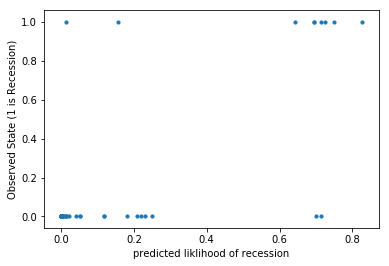

Validation MAE for Random Forest Model: 0.1167864303575978


[[0.99590327 0.00409673]]


In [23]:
#training model for recessions 2 quarters down the road
rf_random3 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 75, cv = 5, verbose=2, random_state=1, n_jobs = -1)
rf_random3.fit(train_X3, train_y3)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  4.3min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=75, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [27]:
#training model for recessions 2 quarters down the road
rf_random4 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 75, cv = 5, verbose=2, random_state=1, n_jobs = -1)
rf_random4.fit(train_X4, train_y4)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  4.9min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=75, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

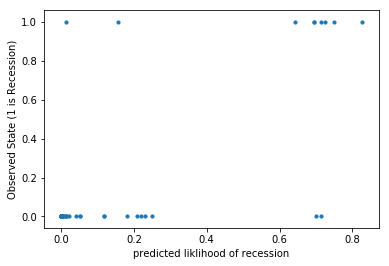

Validation MAE for RF Q2: 0.1167864303575978


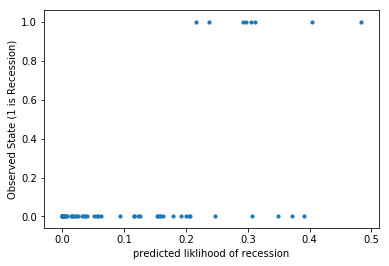

Validation MAE for RF Q3: 0.17206123085487307


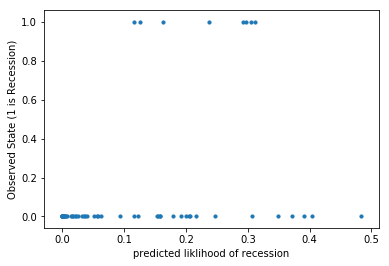

Validation MAE for RF Q4: 0.19615703399809006


In [28]:
preds = [item[1] for item in pred]
plt.scatter(preds, val_y, s=10)
plt.xlabel("predicted liklihood of recession")
plt.ylabel("Observed State (1 is Recession)")
plt.show()
rf_val_mae = mean_absolute_error(preds, val_y)
print("Validation MAE for RF Q2: {}".format(rf_val_mae))

pred3 = rf_random3.predict_proba(val_X3)
preds3 = [item[1] for item in pred3]
plt.scatter(preds3, val_y3, s=10)
plt.xlabel("predicted liklihood of recession")
plt.ylabel("Observed State (1 is Recession)")
plt.show()
rf_val_mae = mean_absolute_error(preds3, val_y3)
print("Validation MAE for RF Q3: {}".format(rf_val_mae))

pred4 = rf_random4.predict_proba(val_X4)
preds4 = [item[1] for item in pred3]
plt.scatter(preds4, val_y4, s=10)
plt.xlabel("predicted liklihood of recession")
plt.ylabel("Observed State (1 is Recession)")
plt.show()
rf_val_mae = mean_absolute_error(preds4, val_y4)
print("Validation MAE for RF Q4: {}".format(rf_val_mae))

In [29]:
forecast = rf_random.predict_proba(dfForecast)
forecast3 = rf_random3.predict_proba(dfForecast)
forecast4 = rf_random4.predict_proba(dfForecast)
print(forecast, forecast3, forecast4)


[[0.99590327 0.00409673]] [[0.94395376 0.05604624]] [[0.94395376 0.05604624]]
